## 实验5 文本分类-朴素贝叶斯

1.1 基于NLTK的朴素贝叶斯分类器实现人名分类。

In [1]:
def gender_features(word):
    return {'last_letter':word[-1]}
#定义取倒数第一个字母的函数
gender_features('Shrek')

{'last_letter': 'k'}

In [7]:
#从语料库中取出需要的名字-性别数据，并进行预处理
from nltk.corpus import names
labeled_names=([(name,'male') for name in names.words('male.txt')]+
               [(name,'female') for name in names.words('female.txt')])
import random
random.shuffle(labeled_names)
len(labeled_names)

7944

In [20]:
#划分训练集和测试集，训练分类模型
import nltk
featuresets=[(gender_features(n),gender) for (n,gender) in labeled_names]
train_set=featuresets[1000:]
test_set=featuresets[:1000]
classifier=nltk.NaiveBayesClassifier.train(train_set)
classifier.classify(gender_features('Neo'))
#gender_features('Neo')

'male'

In [21]:
#利用测试集对分类器的准确度进行评价
print(nltk.classify.accuracy(classifier,test_set))

0.742


1.2 通过选择新的特征(或者加入新特征），改进基于NLTK的人名NaiveBayes分类器。

In [31]:
def gender_features(word):
    return {'first_letter':word[0],'last_letter':word[-1]}
#首字母和末尾字母

from nltk.classify import apply_features
train_set=apply_features(gender_features,labeled_names[1000:])
test_set=apply_features(gender_features,labeled_names[:1000])
classifier=nltk.NaiveBayesClassifier.train(train_set)

print(nltk.classify.accuracy(classifier,test_set))

0.759


In [33]:
def gender_features(word):
    return {'last2_letter':word[-2],'last_letter':word[-1]}
#倒数两个字母

from nltk.classify import apply_features
train_set=apply_features(gender_features,labeled_names[1000:])
test_set=apply_features(gender_features,labeled_names[:1000])
classifier=nltk.NaiveBayesClassifier.train(train_set)

print(nltk.classify.accuracy(classifier,test_set))

0.756


In [36]:
def gender_features(word):
    return {'first_letter':word[0],'last_letter':word[-1],'length':len(word)}
#首字母,末尾字母,名字长度

from nltk.classify import apply_features
train_set=apply_features(gender_features,labeled_names[1000:])
test_set=apply_features(gender_features,labeled_names[:1000])
classifier=nltk.NaiveBayesClassifier.train(train_set)

print(nltk.classify.accuracy(classifier,test_set))

0.757


1.3 分析特征的有效性。

In [ ]:
#在以上几种特征组合训练的分类器中，使用首字母+末尾字母的分类器精度最大，为0.759

2 编程实现朴素贝叶斯，以简单语料为例。
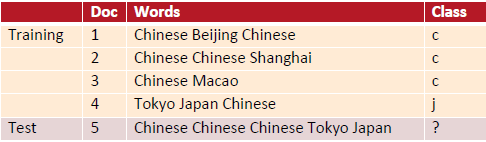

In [45]:
documents = [(['Chinese,Beijing,Chinese'],'c'),(['Chinese','Chinese','Shanghai'],'c')
            (['Chinese','Macao'],'c'),(['Tokyo','Japan','Chinese'],'j')]


TypeError: 'tuple' object is not callable